In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

Step 2 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26526/117902/'>link</a>
<br>💀 Сложное задание! 💀

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

Пример итоговой таблицы:

<br>    product_id  quantity    name             date
<br>0       56          2         Anatoly_Karpov   2020-12-30
<br>1       7           2         Anatoly_Karpov   2020-12-30
<br>2       9           3         Anatoly_Karpov   2020-12-30

Для объединения датафреймов, читаемых из файлов, можно использовать метод pd.concat(). Например:

1. Имеются следующие данные:

df_1
<br>    product_id  quantity    name               date
<br>0       56          2         Anatoly_Karpov     2020-12-30
<br>1       7           2         Anatoly_Karpov     2020-12-30
<br>2       9           3         Anatoly_Karpov     2020-12-30

 df_2
<br>    product_id  quantity    name               date
<br>0       4           2         Кatya_Skriptsova   2020-12-30
<br>1       71          1         Кatya_Skriptsova   2020-12-31

2. Соединяем, передав pd.concat на вход список датафреймов, которые нужно объединить. Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.

df = pd.concat([df_1, df_2])
<br>df
<br>    product_id  quantity    name                date
<br>0       56          2         Anatoly_Karpov      2020-12-30
<br>1       7           2         Anatoly_Karpov      2020-12-30
<br>2       9           3         Anatoly_Karpov      2020-12-30
<br>0       4           2         Кatya_Skriptsova    2020-12-30
<br>1       71          1         Кatya_Skriptsova    2020-12-31

В качестве ответа укажите сумму по колонке quantity.

In [54]:
file_pathes = [path for path in Path('data/').rglob('*.csv')]
len(file_pathes)

44

In [55]:
#from pathlib import Path
root = Path('data/')

df = pd.DataFrame()

for path_to_file in root.rglob('*.csv'):
    tmp_df = pd.read_csv(path_to_file, index_col=0)
    splitted = str(path_to_file).split('\\')
    tmp_df['name'] = splitted[2]
    tmp_df['date'] = pd.to_datetime(splitted[1])
    
    df = pd.concat([df, tmp_df])

df = df.reset_index(drop=True)

In [56]:
df.shape

(161, 4)

In [57]:
df.quantity.sum()

480

Step 3 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26526/117902/'>link</a>
<br>Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:

Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [80]:
quantity_df = df.groupby(by='name', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False)

#get top buyers
top = quantity_df[quantity_df.quantity == quantity_df.quantity.max()].name.to_list()

print(', '.join(top))

Alexey_Smirnov, Petr_Smirnov


Step 4 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26526/117904/'>link</a>
<br>Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [91]:
df.product_id.nunique()

71

In [107]:
top_products = df.groupby(by='product_id', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10)

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

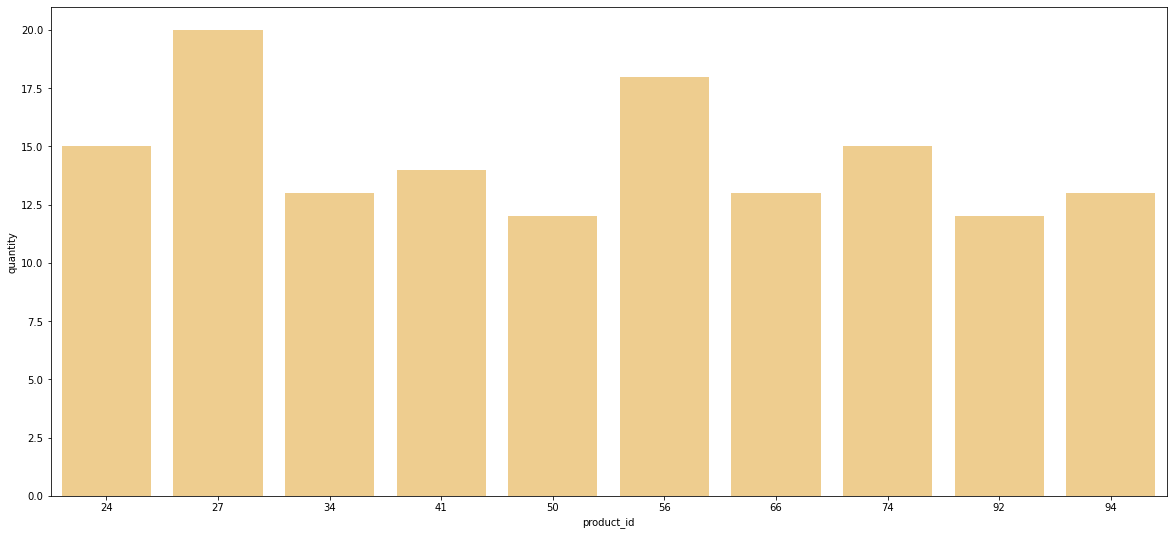

In [113]:
plt.figure(figsize=(20,9))
sns.barplot(data=top_products, x='product_id', y='quantity', color='orange', alpha=0.5)

Step 5 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26526/117905/'>link</a>
<br>Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). Далее выберите верные утверждения:

<br>Меньше всего продуктов было приобретено 4 декабря
<br>5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день
<br>7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
<br>Максимальное число товаров было продано 4 декабря
<br>8 и 9 декабря было продано примерно одинаковое число товаров
<br>Меньше всего товаров было приобретено 6 декабря
<br>4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
<br>5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

In [115]:
date_df = df.groupby(by='date', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False)

date_df.head()

,date,quantity
1,2020-12-04,113
4,2020-12-07,94
6,2020-12-09,69
5,2020-12-08,68
2,2020-12-05,61


In [127]:
order = date_df.date.sort_values()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2020-12-03'),
  Text(1, 0, '2020-12-04'),
  Text(2, 0, '2020-12-05'),
  Text(3, 0, '2020-12-06'),
  Text(4, 0, '2020-12-07'),
  Text(5, 0, '2020-12-08'),
  Text(6, 0, '2020-12-09')])

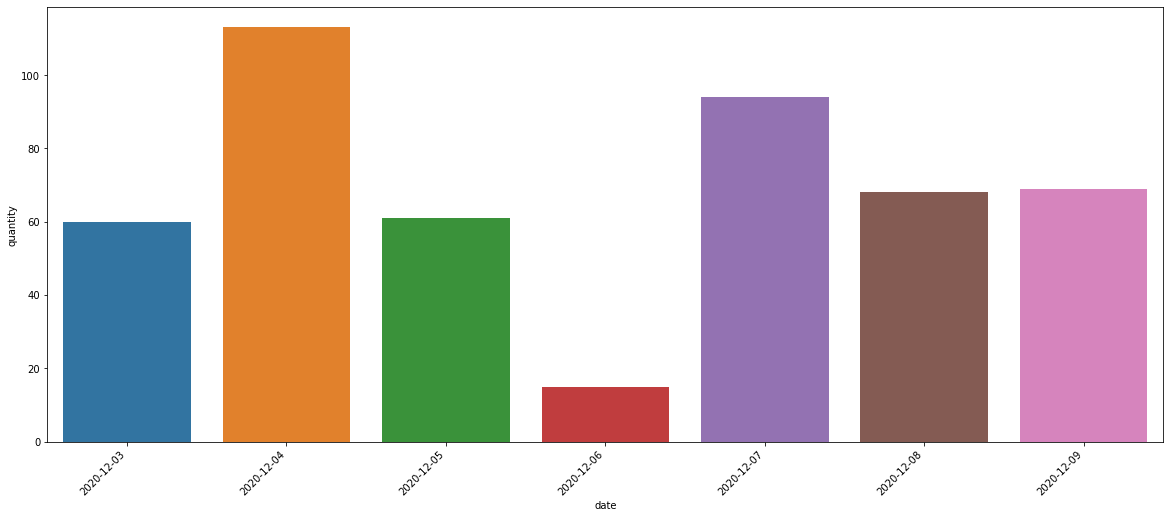

In [134]:
fig, ax = plt.subplots(figsize = (20,8))
ax = sns.barplot(data=date_df, x='date', y='quantity', ax=ax, order=order)

x_dates = order.dt.strftime('%Y-%m-%d')
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

plt.xticks(rotation=45)

Step 6 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26526/117906/'>link</a>
<br>💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [141]:
df.groupby(by=['product_id','name'], as_index=False) \
    .agg({'date':pd.Series.nunique}) \
    .sort_values('date', ascending=False) \
    .query('date > 1')

,product_id,name,date
24,15,Anton_Ivanov,2
150,94,Petr_Fedorov,2
